## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 4: Modelado no supervisado en Machine Learning
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 4! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el caso y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
- Diseñarás y aplicarás un modelo de *clustering*.
- Indicarás la cantidad óptima de grupos dado un conjunto que se te proporcionará.
- Generarás visualizaciones para *clustering* y método del codo.
- Usarás por lo menos un índice de desempeño para evaluar el modelo.


## Caso de estudio

Una empresa financiera tiene un nuevo producto dirigido a sus clientes con diferentes límites de crédito, por ello, es necesario dividir a los clientes en grupos más pequeños.

Desafortunadamente, los directivos no tienen idea de cuál es la cantidad óptima en la que se puede segregar a los clientes y cómo dirigir a nuevos clientes a esos grupos.

Es por eso que en este punto se te ha contratado. Para poder ejecutar tu trabajo te han compartido una base de datos que contiene las características que, según sus informes, son los más importantes para la aplicación de este programa. Consiste en seis puntos:
- **Salario mensual:** indica el ingreso mensual del cliente en pesos mexicanos.
- **Crédito tipo 1:** es un producto financiero que el cliente ha obtenido de la institución financiera; `1` significa que tiene este producto y `0` que no cuenta con él.
- **Crédito tipo 2:** es similar a las características del anterior; `1` significa que cuenta con el producto y `0` que no.
- **Límite de TC:** indica el límite de crédito de la tarjeta del cliente.
- **Años siendo cliente:** corresponde al tiempo que el cliente ha tenido una relación comercial con la institución financiera.
- **Previamente se ofreció el producto:** es la versión previa del producto e indica si el cliente se mostró interesado en obtenerlo (`1`) o no (`0`).

El archivo puede ser descargado aquí: https://drive.google.com/file/d/1wcjPCZPTMuDlyWcE1Do4-yqU5AglW_p9/view?usp=sharing

### Observaciones

El cliente requiere que le indiques la cantidad óptima de grupos en los que deberás catalogar a sus clientes. Para ello, usa el método del codo y grafícalo. Recuerda que tus clientes necesitan apoyos visuales.

Una vez que tengas la cantidad de grupos óptimos, deberás aplicar un método de *clustering*. El cliente solicita que le muestres gráficamente cómo están organizados los clientes. Para ello, usa una gráfica de dispersión o la que creas más conveniente.

Incluye, por lo menos, un índice de desempeño (*scoring*) para complementar tus análisis.

Tus visualizaciones deberán tener título y estar presentables. Puedes usar **Pyplot** o **Seaborn**.

Deberás escribir un texto explicando qué representa tu análisis. Usa un lenguaje que vaya dirigido a personas que no saben de ciencia de datos o matemáticas, esto es muy común en la realidad. Deberás hablar de tu gráfica, tus resultados y el manejo de la información, así como del beneficio de usar tu modelo.

Como reto adicional se te proprocionará un archivo en la liga siguiente: https://drive.google.com/file/d/1Nkoc-6AeC3Vzy7gfCNB_DlWTs4dXz7Ug/view?usp=sharing, la cual incluye 50 clientes más. Deberás aplicar el método que usaste para entrenar con tu primer modelo y aplicarlo en estos nuevos clientes. No olvides graficarlos (solo a los nuevos 50 clientes).


## Criterios de evaluación

Modelar el *clustering* correctamente:
- Determinar el número máximo de *clusters* y aplicar PCA (**2 puntos**).
- Hacer el diagrama de codo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Seleccionar y entrenar modelo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Generar la visualización de datos con un diseño personalizado y agregar títulos y leyendas (**2 puntos**).
- Evaluar el desempeño aplicado y explicar el modelo, la gráfica y el uso de datos a una persona que no es científica de datos (**2 puntos**). Si las explicaciones son dudosas, equivocadas o sin comentarios suficientes, solo tendrás **1 punto**.

**Punto extra**
- Si aplicas el mismo modelo que ya creaste en los nuevos 50 registros, obtendrás **1 punto** extra.
 **Nota:** No debes realizar un nuevo modelo, sino aplicar el ya hecho.
- Si estos nuevos 50 registros se agregan a los registros previos con los que diseñaste la primera gráfica, tendrás **1 punto** extra. Puedes diferenciarlos cambiándoles la forma, color o tamaño; así resaltarán más. Este punto no es válido si la grafica no tiene títulos, etiquetas y leyendas.

¡Éxito! Te vemos en el contenido del siguiente módulo.

##Importación de datos##

In [375]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2
import datetime

from sklearn.cluster         import KMeans
from sklearn.decomposition   import PCA
from sklearn.neighbors       import NearestNeighbors
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import silhouette_score
from yellowbrick.cluster     import KElbowVisualizer
from mpl_toolkits.mplot3d    import Axes3D

#warnings
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [376]:
# Importar datos
cust = pd.read_csv('/content/drive/MyDrive/Bootcamp/costumers.csv')

##EDA##

In [377]:
cust.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0


In [378]:
cust.shape

(500, 6)

In [379]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            500 non-null    float64
 1   Credito_tipo_1     500 non-null    int64  
 2   Credito_tipo_2     500 non-null    int64  
 3   Limite_TC          500 non-null    float64
 4   Tiempo_cliente     500 non-null    float64
 5   Producto_ofrecido  500 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 23.6 KB


In [380]:
cust.describe()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,12089.097380,0.610000,0.458000,44784.554960,4.327000,0.602000
std,5123.700116,0.488238,0.498732,22150.923996,4.784776,0.489976
min,-2911.650000,0.000000,0.000000,-22207.950000,0.000000,0.000000
25%,8534.350000,0.000000,0.000000,30096.285000,0.000000,0.000000
50%,11438.600000,1.000000,0.000000,47991.515000,0.000000,1.000000
75%,15171.467500,1.000000,1.000000,59108.175000,8.400000,1.000000
max,30041.400000,1.000000,1.000000,118636.820000,19.300000,1.000000


A primera vista, nuestro dataset tiene 500 registros y 6 variables, de las cuales todas son numéricas.
No tiene datos nulos.

In [381]:
#verificar los duplicados de 'cust'
cust.duplicated().sum()

0

In [382]:
#verificar la completitud de 'cust'
completitud = pd.DataFrame(cust.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns = {"index":"columna",0:"total_dfaltantes"})
completitud["completitud"] = (1 - completitud["total_dfaltantes"] / cust.shape[0]) * 100
completitud = completitud.sort_values(by = "completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud

,columna,total_dfaltantes,completitud
0,Salario,0,100.0
1,Credito_tipo_1,0,100.0
2,Credito_tipo_2,0,100.0
3,Limite_TC,0,100.0
4,Tiempo_cliente,0,100.0
5,Producto_ofrecido,0,100.0


- El dataset no tiene registros duplicados y la completitud es del 100%.

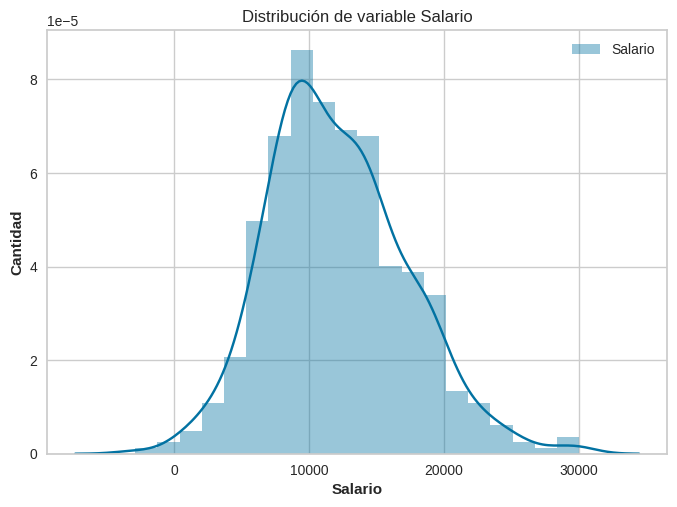

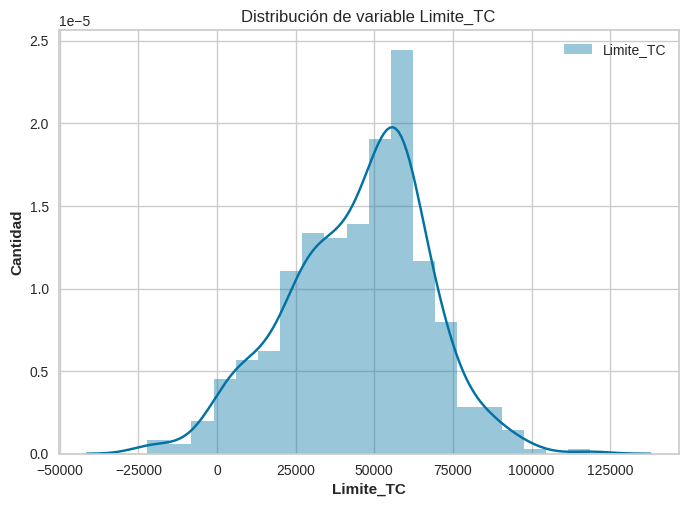

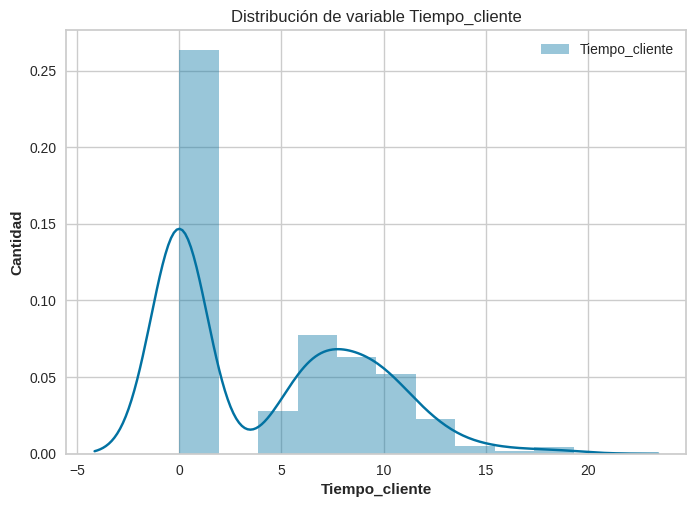

In [383]:
# Grafico de distribucion de la variable 'Salario'
sns.distplot(cust['Salario'], label='Salario')
plt.title('Distribución de variable Salario')
plt.xlabel('Salario', fontweight='bold')
plt.ylabel('Cantidad', fontweight='bold')
plt.legend()
plt.show()

# Grafico de distribucion de la variable 'Limite_TC'
sns.distplot(cust['Limite_TC'], label='Limite_TC')
plt.title('Distribución de variable Limite_TC')
plt.xlabel('Limite_TC', fontweight='bold')
plt.ylabel('Cantidad', fontweight='bold')
plt.legend()
plt.show()

# Grafico de distribucion de la variable 'Tiempo_cliente'
sns.distplot(cust['Tiempo_cliente'], label='Tiempo_cliente')
plt.title('Distribución de variable Tiempo_cliente')
plt.xlabel('Tiempo_cliente', fontweight='bold')
plt.ylabel('Cantidad', fontweight='bold')
plt.legend()
plt.show()


In [384]:
#'value_counts' de la variable 'Tiempo_cliente'
cust['Tiempo_cliente'].value_counts().sort_index()

Tiempo_cliente
0.0     254
5.0       1
5.1       5
5.2       5
5.3       3
       ... 
16.6      1
17.8      1
17.9      1
18.1      1
19.3      1
Name: count, Length: 88, dtype: int64

- Los valores de las variables 'Salario' y 'Limite_TC' tienen una distribución normal, lo que significa que la presencia de outliers puede que no exista, y si las hay son muy pocas y no generarán impacto en nuestras predicciones.

- En el caso de la variable 'Tiempo_cliente' podemos ver que aproximadamente la mitad de los registros (incluso un poco más) se sitúan en el valor '0' y la otra mitad se reparte en orden ascendente desde el valor '5'.

- A raíz de esta información podemos interpretar que esta empresa financiera por alguna razón que desconocemos no captó clientes nuevos por un periodo de 5 años, aunque siguió prestando servicios a aquellos con los cuales ya tenían una relación comercial. Podríamos inferir que ahora se encuentran en una situación en la cual están enfocados en volver a captar clientes nuevos mediante la estrategia de ofrecer un nuevo producto.

- Debido a esto último, los valores '0' en la variable 'Tiempo cliente' no son considerados outliers, porque nos entregan una información crucial para entender los datos y el contexto.

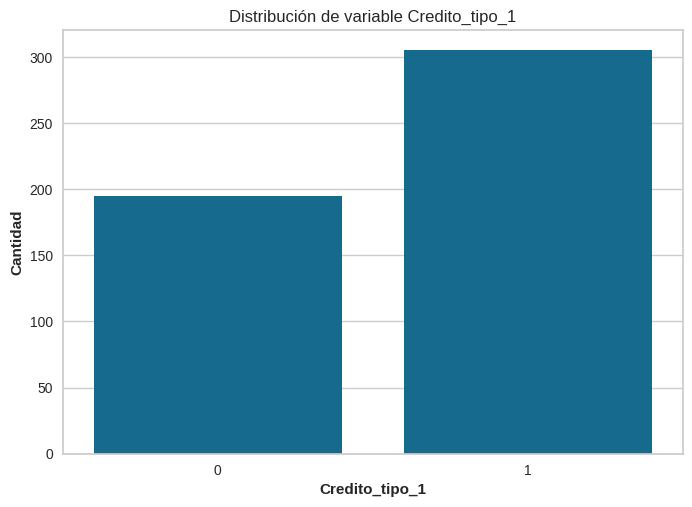

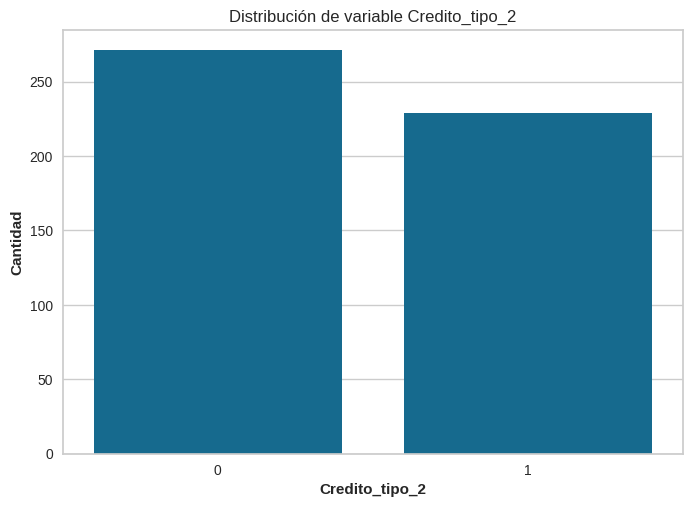

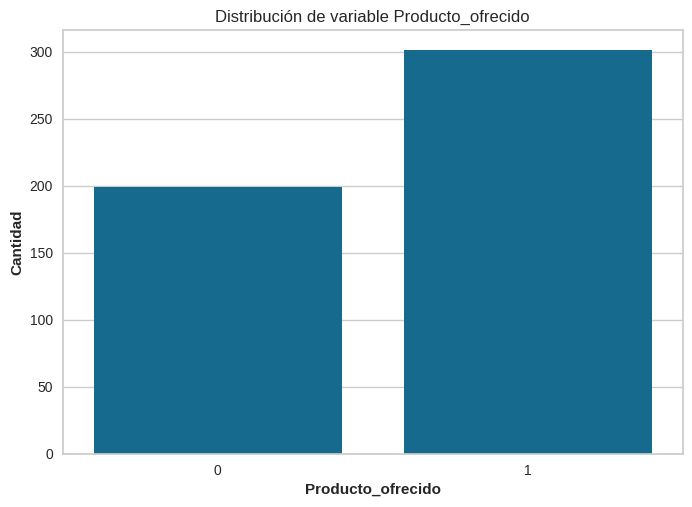

In [385]:
#gráficos de distribucion de variables 'Credito_tipo_1', 'Credito_tipo_2' y 'Producto_ofrecido'

# Grafico de distribucion de la variable 'Credito_tipo_1'
sns.countplot(x='Credito_tipo_1', data=cust)
plt.title('Distribución de variable Credito_tipo_1')
plt.xlabel('Credito_tipo_1', fontweight='bold')
plt.ylabel('Cantidad', fontweight='bold')
plt.show()

# Grafico de distribucion de la variable 'Credito_tipo_2'
sns.countplot(x='Credito_tipo_2', data=cust)
plt.title('Distribución de variable Credito_tipo_2')
plt.xlabel('Credito_tipo_2', fontweight='bold')
plt.ylabel('Cantidad', fontweight='bold')
plt.show()

# Grafico de distribucion de la variable 'Producto_ofrecido'
sns.countplot(x='Producto_ofrecido', data=cust)
plt.title('Distribución de variable Producto_ofrecido')
plt.xlabel('Producto_ofrecido', fontweight='bold')
plt.ylabel('Cantidad', fontweight='bold')
plt.show()

- Los valores de la variable 'Credito_tipo_1' tienen una proporción aproximada de 60%-40%, al igual que la variable 'Producto_ofrecido'

- En la variable 'Credito_tipo_2' hay una proporción más equitativa, más cercana a un 55%-45% entre sus dos valores.

- A continuación vamos a realizar la estandarización de nuestros datos para trabajarlos de forma adecuada.

In [386]:
#Estandarización de datos
scaler = StandardScaler()
cust_scaled = scaler.fit_transform(cust)
cust_scaled_df = pd.DataFrame(cust_scaled, columns=cust.columns)
cust_scaled_df

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,2.048190,0.799590,-0.919249,-0.661936,-0.905232,0.813099
1,-0.289037,0.799590,1.087845,0.399452,-0.905232,0.813099
2,-0.392613,-1.250641,1.087845,-1.204275,-0.905232,-1.229863
3,0.348193,0.799590,-0.919249,-0.630528,-0.905232,0.813099
4,-1.083825,-1.250641,1.087845,-1.091716,-0.905232,-1.229863
...,...,...,...,...,...,...
495,-0.590783,-1.250641,1.087845,-0.104145,-0.905232,-1.229863
496,0.212284,0.799590,-0.919249,2.538958,3.132434,0.813099
497,0.569595,-1.250641,1.087845,-1.674649,-0.905232,-1.229863
498,0.988520,0.799590,-0.919249,-0.644776,-0.905232,0.813099


##PCA##

- Antes de realizar nuestra segmentación, vamos a hacer un PCA (análisis de componentes principales), que es un método que se usa para transformar un conjunto de variables en uno más pequeño que contenga la mayor parte de la información inicial.

In [387]:
pca = PCA()
cust_pca = pca.fit_transform(cust_scaled_df)  # Aplicamos PCA a los datos estandarizados
pca.explained_variance_ratio_.cumsum()        # Calculamos la varianza explicada acumulada

array([0.36055633, 0.66143598, 0.82806264, 0.95002119, 0.98274733,
       1.        ])

In [388]:
cust_pca

array([[ 0.76339358,  2.13976463,  1.5112371 , -0.0472969 ,  0.28594515,
        -0.26263625],
       [-0.30288319, -0.46977769,  0.70948985, -1.28670487,  0.98461262,
        -0.32488985],
       [-2.34491451,  0.4649835 , -0.94799717,  0.22787612,  0.07319746,
        -0.11455269],
       ...,
       [-2.36051918,  1.23473066, -0.56962649,  0.77882946,  0.39991417,
        -0.14426418],
       [ 0.55397363,  1.5544434 ,  1.11725258, -0.60578864, -0.0570275 ,
         0.12719778],
       [ 2.77112587, -1.30238513,  0.48387666,  1.0039334 , -0.01749406,
         0.13615815]])

- El PCA nos dará tantos componentes principales como variables tenga nuestro dataset original.

- Al calcular la ''varianza explicada acumulada'' nos podemos dar cuenta que al tomar en cuenta los primeros 3 componentes principales tenemos una representación mayor del 80% de nuestros datos, porcentaje que es considerado suficiente para trabajar en nuestro modelo.

In [389]:
pca = PCA(n_components=3)
cust_pca_3com = pca.fit_transform(cust_scaled_df)

In [390]:
cust_pca_3com

array([[ 0.76339358,  2.13976463,  1.5112371 ],
       [-0.30288319, -0.46977769,  0.70948985],
       [-2.34491451,  0.4649835 , -0.94799717],
       ...,
       [-2.36051918,  1.23473066, -0.56962649],
       [ 0.55397363,  1.5544434 ,  1.11725258],
       [ 2.77112587, -1.30238513,  0.48387666]])

- Luego, visualizamos nuestros 3 componentes principales en un gráfico de 3 dimensiones.

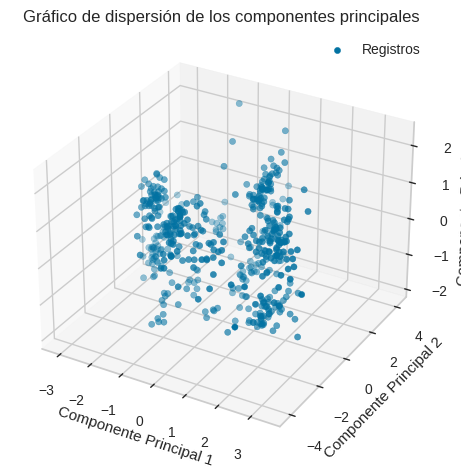

In [391]:
# Creamos la figura y el objeto de ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficamos los puntos en 3D
ax.scatter(cust_pca_3com[:, 0], cust_pca_3com[:, 1], cust_pca_3com[:, 2])

# Configuramos las etiquetas de los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Agregamos título y leyenda
plt.title('Gráfico de dispersión de los componentes principales')
plt.legend(['Registros'])

# Mostramos el gráfico
plt.show()


- Podemos ver la dispersión de nuestros registros en 3 dimensiones luego de aplicar la técnica de PCA con 3 componentes principales.

- A menor opacidad del color del punto que representa cada registro, se encuentra más "alejado" desde nuestro punto de vista hacia el gráfico.

(En la visualización de los gráficos en 3D, hay un problema con el nombre de uno de los ejes, en este caso el "Componente principal 3", donde no se logra ver con claridad la leyenda).

##Clustering##

- Para nuestro clustering o segmentación vamos a usar la técnica denominada "K-means", porque es la más utilizada y genera resultados consistentes. K-means usa como refenencia la distancia que hay entre nuestros registros representados en puntos. El resultado es una partición de los datos en "k" grupos donde los puntos dentro de cada grupo son más similares entre sí que a los puntos en otros grupos.

- Previo a la segmentación, tenemos que utilizar el "método del codo" para determinar cuántos segmentos son los óptimos para realizar nuestro modelo. Este método nos brindará un número de segmentos (k) evaluándolos según el ''Distorsion Score'', que es la suma de la distancia de cada uno de los segmentos.

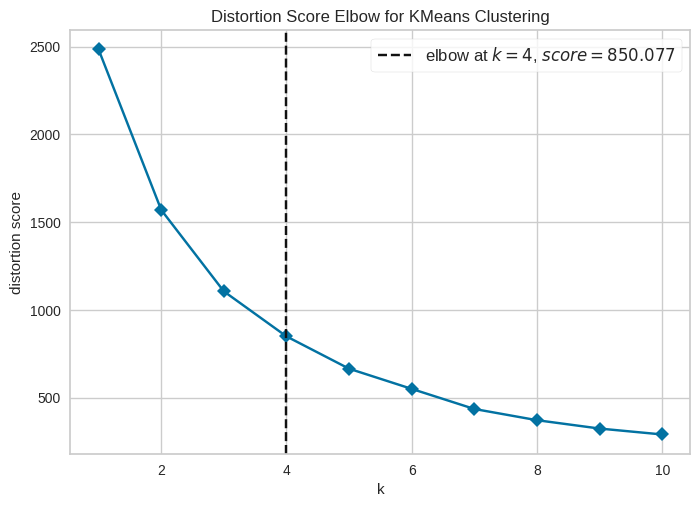

Text(0.5, 1.0, 'Gráfico de Codo para Determinar el Número Óptimo de Clústeres')

In [392]:
model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(1, 11), timings=False)
visualizer.fit(cust_pca_3com)
visualizer.show()
visualizer.ax.set_title('Gráfico de Codo para Determinar el Número Óptimo de Clústeres')


- La línea punteada vertical nos señala el lugar de la recta donde se encuentra el número optimo de clusters. En este caso es 4.

- Por lo tanto, vamos a proceder a trabajar nuestro modelo de segmentación para que reparta la información en 4 segmentos.

In [393]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(cust_pca_3com)

- Con nuestro modelo de clustering ya entrenado, vamos a visualizar la segmentación de nuestros datos mediante un gráfico de dispersión de 3 dimensiones.

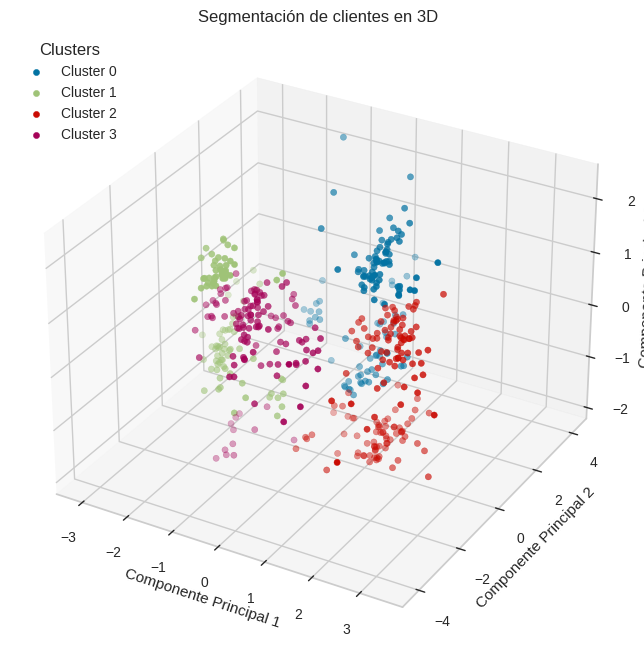

In [394]:
# Creamos la figura y el objeto de ejes 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficamos los puntos en 3D, asignando un color a cada cluster
for cluster in range(4):
    cluster_points = cust_pca_3com[clusters == cluster]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster}')

# Configuramos las etiquetas de los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Agregamos una leyenda
ax.legend(loc='upper left', title='Clusters', fontsize='small', title_fontsize='medium')  # Ajusta la posición, título y tamaño de la leyenda

# Agregamos el título
ax.set_title('Segmentación de clientes en 3D')

# Mostramos el gráfico
plt.show()


- Vemos las distribución de nuestros 4 segmentos en 3 dimensiones, cada uno catalogado del 0 al 3, con su respectivo color.

- Ahora, para evaluar el dessempeño de nuestro modelo, vamos a usar la métrica denominada "Coeficiente de Silueta", el cual es una medida que evalúa la calidad de los clústeres formados por un algoritmo de agrupamiento. Sirve para entender qué tan bien separados y cohesivos son los clústeres resultantes. Su resultado oscila en 1 y -1.

Valor cercano a 1: mayor distancia entre los segmentos que entre los elementos del mismo segmento, lo que los hace más notorios.

Valor cercano a -1: la distancia entre los segmentos es menor, lo que hace los segmentos menos distinguibles. Puede haber incluso mayor distancia de los puntos dentro de un mismo segmento y menor distancia con otros segmentos del cual no se es parte. En este caso podríamos elegir una cantidad de segmentos (K) distinta que permita segmentar mejor los datos.

In [395]:
silhouette_avg = silhouette_score(cust_pca_3com, clusters)
print("El coeficiente de silueta promedio es :", silhouette_avg)

El coeficiente de silueta promedio es : 0.38201724442356816


- Un valor de 0.38 en el ''coeficiente de silueta'' indica que los clústeres formados son moderadamente compactos y bien separados, pero no de manera óptima.

- Se puede considerar ajustar el número de clústeres o probar diferentes algoritmos de agrupamiento para ver si se obtienen mejores resultados.










- A continuación, vamos a agregar una columna a nuestro dataset original ('cust') con el segmento al cual corresponde cada uno de nuestros registros, según el modelo que entrenamos.

In [396]:
cust['Segmento'] = clusters
cust.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Segmento
0,22572.91,1,0,30136.74,0.0,1,0
1,10609.64,1,1,53623.94,0.0,1,3
2,10079.48,0,1,18135.44,0.0,0,1
3,13871.35,1,0,30831.75,0.0,1,0
4,6541.46,0,1,20626.23,0.0,0,1


In [397]:
cust['Segmento'].value_counts()

Segmento
2    150
0    129
3    121
1    100
Name: count, dtype: int64

- Podemos ver cuántos clientes tiene cada uno de nuestros segmentos:
  - Segmento 0: 129 clientes
  - Segmento 1: 100 clientes
  - Segmento 2: 150 clientes
  - Segmento 3: 121 clientes



In [398]:
# Descripción de cada segmento
for i in range(4):
    print(f"Descripción del Segmento {i}:")
    print(cust[cust['Segmento'] == i].describe())
    print("\n")


Descripción del Segmento 0:
            Salario  Credito_tipo_1  Credito_tipo_2     Limite_TC  \
count    129.000000      129.000000           129.0    129.000000   
mean   17535.789147        0.875969             0.0  30102.760078   
std     4231.062152        0.330902             0.0  14676.111862   
min     8741.110000        0.000000             0.0 -22207.950000   
25%    14771.530000        1.000000             0.0  22759.190000   
50%    17547.160000        1.000000             0.0  33616.910000   
75%    19533.560000        1.000000             0.0  39897.700000   
max    30041.400000        1.000000             0.0  57285.830000   

       Tiempo_cliente  Producto_ofrecido  Segmento  
count      129.000000         129.000000     129.0  
mean         0.960465           0.565891       0.0  
std          2.550166           0.497572       0.0  
min          0.000000           0.000000       0.0  
25%          0.000000           0.000000       0.0  
50%          0.000000           

##Interpretaciones##

- Ahora vamos a interpretar el resultado de nuestra clusterización.

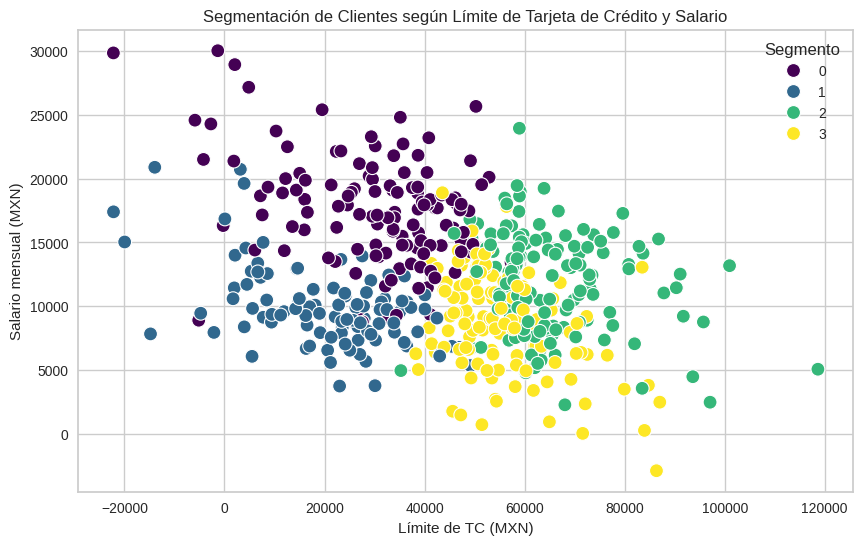

In [399]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cust, x='Limite_TC', y='Salario', hue='Segmento', palette='viridis', s=100)
plt.title('Segmentación de Clientes según Límite de Tarjeta de Crédito y Salario')
plt.xlabel('Límite de TC (MXN)')
plt.ylabel('Salario mensual (MXN)')
plt.legend(title='Segmento')
plt.show()

- Hemos generado una visualización de los segmentos, según el salario de los clientes y su límite en la tarjeta de crédito, todo expresado en Pesos mexicanos.

- En términos generales, vemos que esta empresa financiera trabaja con personas de nivel medio-bajo, ya que el salario más alto es de alrededor de 30 mil pesos mexicanos.

- En el 'segmento 0' están los clientes con el salario más alto, pero con menor límite crediticio. Podríamos concluir que, a pesar de tener mayores ingresos, son percibidos como ''riesgosos''. Esto podría deberse a factores como un historial de crédito negativo, alta utilización de crédito, o deudas pendientes.

- En el 'segmento 1' vemos clientes con sueldos medios-bajos y que la empresa considera que ocupan el crédito en concordancia a su situación económica.

- En el 'segmento 2' nos encontramos con personas con salario variado, pero con alto límite de tarjeta de crédito. Esto quiere decir que su historial de crédito es muy bueno porque la empresa financiera le aumenta su capacidad de crédito con la confianza que deuda será saldada a tiempo. La institución ya conoce su historial y los cataloga como clientes ideales.

- En el 'segmento 3' la situación de los clientes es parecida al 'segmento 2', pero estos clientes tienen un salario más encasillado como medio-bajo. Igualmente el banco los considera clientes responsables y confía en ellos otorgándoles un buen límite de tarjeta de crédito.

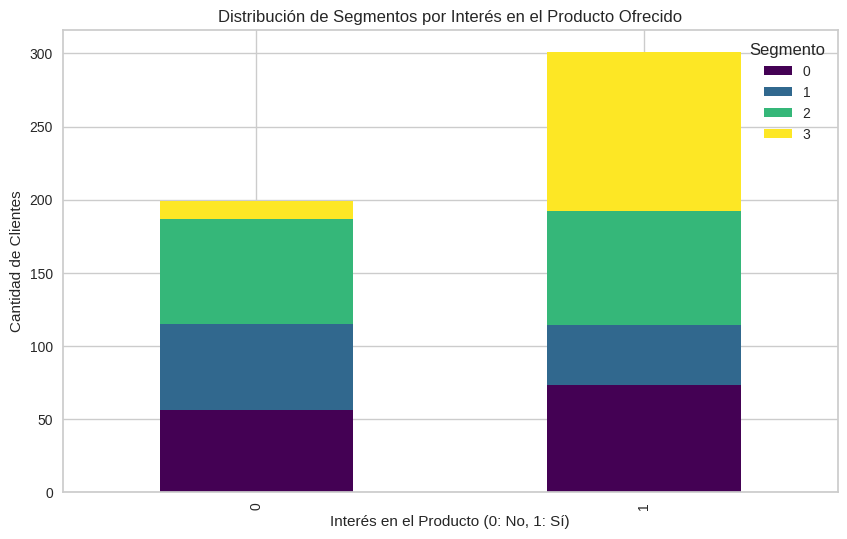

In [400]:
counts = cust.groupby(['Producto_ofrecido', 'Segmento']).size().unstack(fill_value=0)

counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Distribución de Segmentos por Interés en el Producto Ofrecido')
plt.xlabel('Interés en el Producto (0: No, 1: Sí)')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Segmento')
plt.show()

- Además, creamos una visualización que nos muestra cuánto interés previo hay en cada segmento para contratar el nuevo producto que ofrece esta empresa.

- A simple vista, nos damos cuenta que en el 'segmento 3' están los clientes con mayor disponibilidad a obtener el nuevo producto. Sería una idea excelente apuntar a ese segmento para empezar a concretar la venta del producto de manera formal y generar atractivo para los clientes de los otros segmentos, más aún si anteriormente visualizamos que la mayorìa son personas en las cuales el banco confía.

- En los otros segmentos el interés del producto está repartido de forma más equitativa. Habría que analizarlos más profundamente para lograr captar a esos clientes según su perfil.

##Reto Adicional##

In [401]:
# Importar datos
cust_nuevo = pd.read_csv('/content/drive/MyDrive/Bootcamp/new_costumer.csv')
cust_nuevo.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
0,19028.02,1,0,18845.91,0.0,1,3
1,17004.81,1,0,16421.36,0.0,0,2
2,12973.54,1,0,57295.44,9.6,1,2
3,13995.43,0,0,23556.17,7.7,0,3
4,13155.66,0,1,61073.59,10.2,1,0


In [402]:
cust_nuevo.shape

(50, 7)

In [403]:
cust_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            50 non-null     float64
 1   Credito_tipo_1     50 non-null     int64  
 2   Credito_tipo_2     50 non-null     int64  
 3   Limite_TC          50 non-null     float64
 4   Tiempo_cliente     50 non-null     float64
 5   Producto_ofrecido  50 non-null     int64  
 6   Tipo_de_cliente    50 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.9 KB


In [404]:
cust_nuevo.describe()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,13232.11440,0.520000,0.500000,38422.669800,2.944000,0.70000,1.380000
std,5767.07832,0.504672,0.505076,20240.655015,3.973338,0.46291,1.122861
min,-638.96000,0.000000,0.000000,-2756.450000,0.000000,0.00000,0.000000
25%,9783.88750,0.000000,0.000000,22922.617500,0.000000,0.00000,0.000000
50%,12849.83500,1.000000,0.500000,39054.305000,0.000000,1.00000,1.000000
75%,16788.67250,1.000000,1.000000,52052.320000,6.350000,1.00000,2.000000
max,23890.65000,1.000000,1.000000,83578.930000,11.300000,1.00000,3.000000


- A estos 50 nuevos clientes les aplicaremos el mismo modelo Kmeans que ocupamos para el primer clustering, pero antes debemos estandarizar los datos y hacer un PCA de 3 componentes.

In [405]:
# Estandarización de datos
scaler = StandardScaler()
cust_nuevo_scaled = scaler.fit_transform(cust_nuevo)
cust_nuevo_scaled_df = pd.DataFrame(cust_nuevo_scaled, columns=cust_nuevo.columns)
cust_nuevo_scaled_df


,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
0,1.015202,0.960769,-1.0,-0.977019,-0.748461,0.654654,1.457391
1,0.660820,0.960769,-1.0,-1.098022,-0.748461,-1.527525,0.557767
2,-0.045291,0.960769,-1.0,0.941885,1.692173,0.654654,0.557767
3,0.133701,-1.040833,-1.0,-0.741944,1.209131,-1.527525,1.457391
4,-0.013392,-1.040833,1.0,1.130442,1.844713,0.654654,-1.241481
5,-1.582817,-1.040833,1.0,0.399364,-0.748461,0.654654,1.457391
6,-0.622875,0.960769,-1.0,-0.110782,-0.748461,-1.527525,-1.241481
7,-1.758485,0.960769,1.0,1.917851,0.878628,0.654654,-0.341857
8,-0.997061,-1.040833,1.0,1.203149,2.124369,0.654654,-1.241481
9,-1.043989,0.960769,-1.0,1.277313,0.598972,-1.527525,0.557767


In [406]:
pca = PCA(n_components=3)
cust_nuevo_pca = pca.fit_transform(cust_nuevo_scaled_df)  # Aplicamos PCA a los datos estandarizados

In [407]:
#Copiamos el modelo anterior y lo usamos en los registros nuevos
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(cust_nuevo_pca)

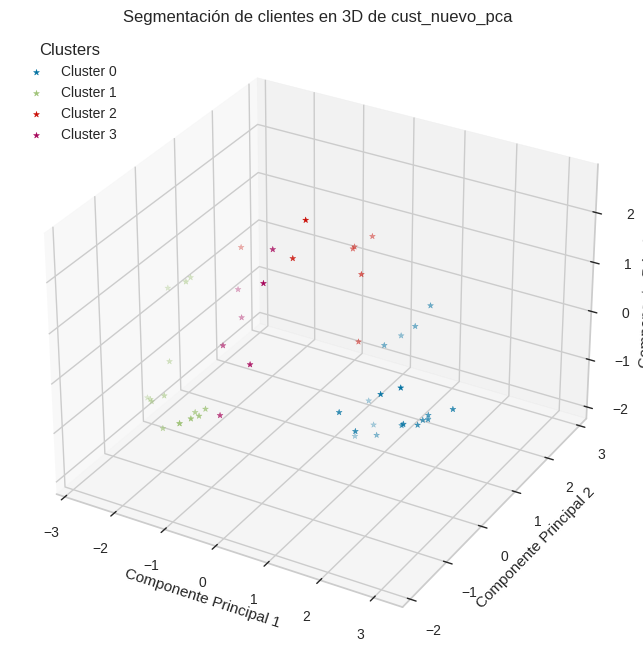

In [408]:
# Creamos la figura y el objeto de ejes 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficamos los puntos en 3D, asignando un color a cada cluster
# Usamos el marcador '*' para representar con estrellas
for cluster in range(4):
    cluster_points = cust_nuevo_pca[clusters == cluster]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster}', marker='*')

# Configuramos las etiquetas de los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Agregamos una leyenda
ax.legend(loc='upper left', title='Clusters', fontsize='small', title_fontsize='medium')  # Ajusta la posición, título y tamaño de la leyenda

# Agregamos el título
ax.set_title('Segmentación de clientes en 3D de cust_nuevo_pca')

# Mostramos el gráfico
plt.show()


In [409]:
#Agregamos una columna a 'cust_nuevo' con el segmento que corresponde cada registro

cust_nuevo['Segmento'] = clusters
cust_nuevo.head()


,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente,Segmento
0,19028.02,1,0,18845.91,0.0,1,3,1
1,17004.81,1,0,16421.36,0.0,0,2,1
2,12973.54,1,0,57295.44,9.6,1,2,3
3,13995.43,0,0,23556.17,7.7,0,3,2
4,13155.66,0,1,61073.59,10.2,1,0,0


In [410]:
# Descripción de cada segmento
for i in range(4):
    print(f"Descripción del Segmento {i}:")
    print(cust_nuevo[cust_nuevo['Segmento'] == i].describe())
    print("\n")


Descripción del Segmento 0:
            Salario  Credito_tipo_1  Credito_tipo_2     Limite_TC  \
count     20.000000       20.000000            20.0     20.000000   
mean    8924.762500        0.200000             1.0  50665.087500   
std     4070.608791        0.410391             0.0  17482.841446   
min     -638.960000        0.000000             1.0  16390.620000   
25%     6814.880000        0.000000             1.0  42752.330000   
50%    10358.250000        0.000000             1.0  48800.970000   
75%    11693.357500        0.000000             1.0  61437.802500   
max    14660.870000        1.000000             1.0  83578.930000   

       Tiempo_cliente  Producto_ofrecido  Tipo_de_cliente  Segmento  
count       20.000000          20.000000        20.000000      20.0  
mean         5.040000           0.950000         0.650000       0.0  
std          4.080557           0.223607         1.089423       0.0  
min          0.000000           0.000000         0.000000       0.0  


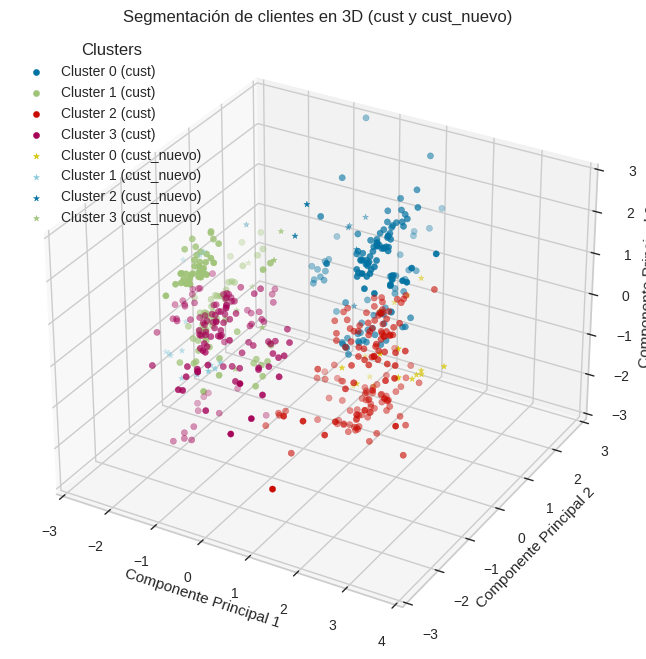

In [415]:
#graficamos los segmentos de 'cust' y 'cust2' en el mismo grafico

# Creamos la figura y el objeto de ejes 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficamos los puntos de 'cust' en 3D, asignando un color a cada cluster
for cluster in range(4):
    cluster_points = cust_pca_3com[cust['Segmento'] == cluster]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster} (cust)', marker='o')

# Graficamos los puntos de 'cust_nuevo' en 3D, asignando un color a cada cluster y usando un marcador diferente
for cluster in range(4):
    cluster_points = cust_nuevo_pca[cust_nuevo['Segmento'] == cluster]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster} (cust_nuevo)', marker='*')

# Configuramos las etiquetas de los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Agregamos una leyenda
ax.legend(loc='upper left', title='Clusters', fontsize='small', title_fontsize='medium')

# Agregamos el título
ax.set_title('Segmentación de clientes en 3D (cust y cust_nuevo)')

# Ajustamos los límites de los ejes
ax.set_xlim([-3, 4])  # Ajusta los límites del eje x
ax.set_ylim([-3, 3])  # Ajusta los límites del eje y
ax.set_zlim([-3, 3])  # Ajusta los límites del eje z

# Mostramos el gráfico
plt.show()


- Los 50 nuevos registros están representados como estrellas.